<a href="https://colab.research.google.com/github/CodingCat-Jung/SmartCity/blob/main/SmartCity01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (31.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and direc

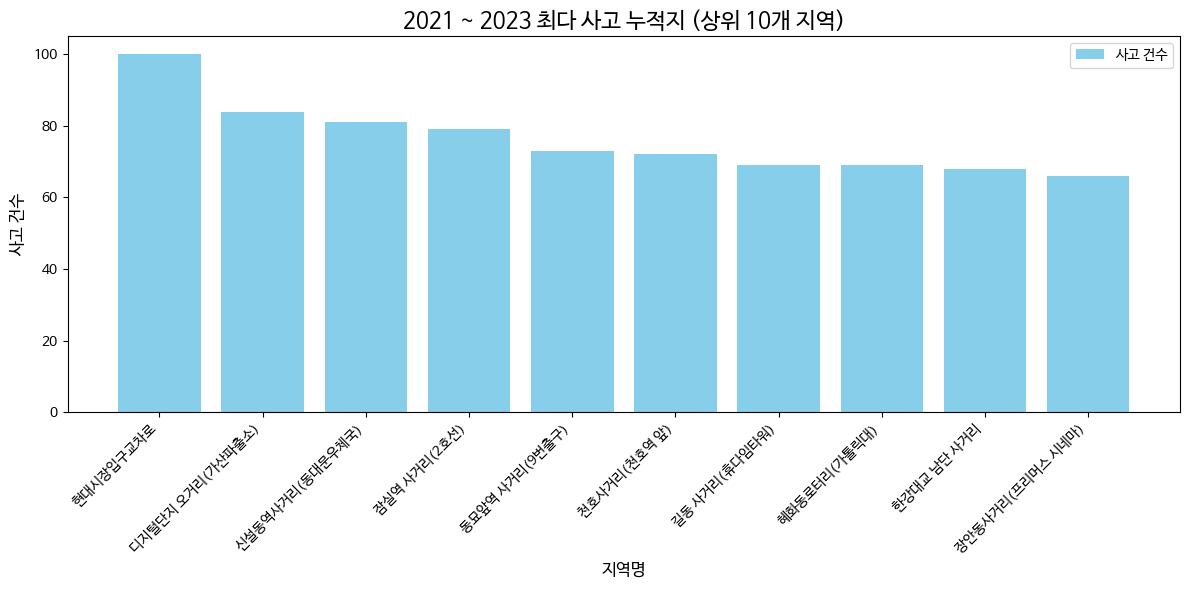

In [1]:
# 2021~2023 최다 사고누적지 파악
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')

# 엑셀 파일 불러오기
df21 = pd.read_excel('2021 지점 사고누적지 사고지표.xls')
df22 = pd.read_excel('2022 지점 사고누적지 사고지표.xls')
df23 = pd.read_excel('2023 지점 사고누적지 사고지표.xls')

# df21.head()

# 각 데이터프레임에서 열 이름 확인 - Unnamed로 표시되는 열 이름 파악
# print(df21.columns)
# print(df22.columns)
# print(df23.columns)

# '지점명'과 '사고 건수' 열이 포함되어 있다고 가정
# 각 데이터프레임에서 '지점명'과 '사고 건수'만 가져옴
df21 = df21[['지역명', '건수', '통합지수']]
df22 = df22[['지역명', '건수', '통합지수']]
df23 = df23[['지역명', '건수', '통합지수']]

# 데이터 병합
df_combined = pd.concat([df21, df22, df23])

# 사고 건수 합산 (지역명 기준)
df_grouped = df_combined.groupby('지역명')[['건수', '통합지수']].sum().reset_index()

# 사고 건수 기준으로 정렬
df_sorted = df_grouped.sort_values(by='건수', ascending=False)

# 결과를 새 엑셀 파일로 저장
df_sorted.to_excel('2021 ~ 2023 서울 지점 사고 건수 합산 결과.xlsx', index=False)

# '합계' 행 제거
df_sorted = df_sorted[df_sorted['지역명'] != '합계']

# 결과 출력
# df_sorted.head()

# 상위 10개 지역 추출
df_top10 = df_sorted.head(10)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_top10['지역명'], df_top10['건수'], color='skyblue', label='사고 건수')

# 그래프 제목 및 레이블 설정
plt.title('2021 ~ 2023 최다 사고 누적지 (상위 10개 지역)', fontsize=16)
plt.xlabel('지역명', fontsize=12)
plt.ylabel('사고 건수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


<ipython-input-2-48eafb63ec2f>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_groups = df.groupby('시간대')['사고건수'].sum().reset_index()


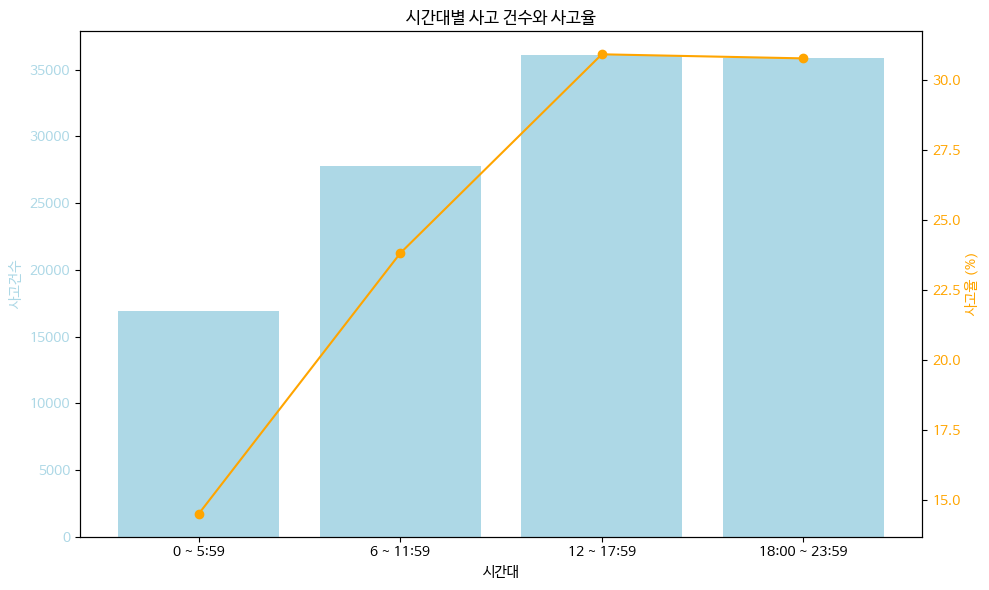

In [2]:
# 시간별 사고율 파악 0 ~ 5:59 / 6 ~ 11:59 / 12 ~ 17:59 / 18:00 ~ 23:59
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 도로교통공단_서울시 일별 시간별 교통사고 현황_20191231.csv 파일 불러오기
df = pd.read_csv('도로교통공단_서울시 일별 시간별 교통사고 현황_20191231.csv', encoding='cp949')
# df.head()

# '발생시간' 컬럼은 HH 형식이므로, 이를 기준으로 시간대 구분
df['시간대'] = df['발생시간'].apply(lambda x: '0 ~ 5:59' if 0 <= int(x) < 6 else
                                     ('6 ~ 11:59' if 6 <= int(x) < 12 else
                                      ('12 ~ 17:59' if 12 <= int(x) < 18 else '18:00 ~ 23:59')))

# 시간대 순서 지정
time_order = ['0 ~ 5:59', '6 ~ 11:59', '12 ~ 17:59', '18:00 ~ 23:59']
df['시간대'] = pd.Categorical(df['시간대'], categories=time_order, ordered=True)

# 각 시간대별 사고 건수 계산
time_groups = df.groupby('시간대')['사고건수'].sum().reset_index()

# 전체 사고 건수 계산
total_accidents = df['사고건수'].sum()

# 각 시간대별 사고율 계산 (전체 사고 건수 대비 비율)
time_groups['사고율'] = (time_groups['사고건수'] / total_accidents) * 100

# 결과를 새로운 데이터프레임으로 저장
time_groups_df = time_groups

# 결과를 새로운 CSV 파일로 저장
output_file = '시간대별_사고율.csv'
time_groups_df.to_csv(output_file, index=False, encoding='utf-8-sig')


plt.rc('font', family='NanumBarunGothic')

# 사고 건수와 사고율을 시각화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 y축: 사고 건수
ax1.bar(time_groups_df['시간대'], time_groups_df['사고건수'], color='lightblue', label='사고건수')
ax1.set_xlabel('시간대')
ax1.set_ylabel('사고건수', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# 두 번째 y축: 사고율
ax2 = ax1.twinx()
ax2.plot(time_groups_df['시간대'], time_groups_df['사고율'], color='orange', marker='o', label='사고율')
ax2.set_ylabel('사고율 (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 제목과 레이블 설정
plt.title('시간대별 사고 건수와 사고율')
fig.tight_layout()

# 그래프 표시
plt.show()

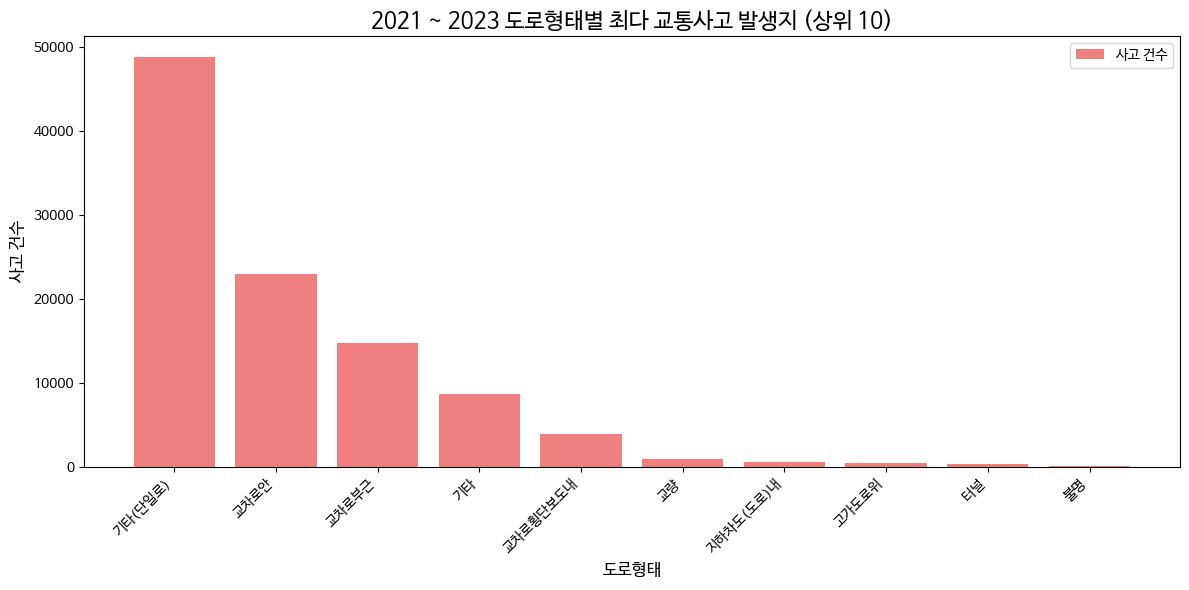

In [8]:
# 2021~2023 도로형태별 최다 교통사고 발생지 파악
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')

# 엑셀 파일 불러오기
df = pd.read_excel('2021 ~ 2023 서울 도로형태별_교통사고지표현황.xls')

df_road = df[['도로형태', '사고건수']]

# 도로 형태별 사고 건수 합산
df_grouped = df_road.groupby('도로형태')['사고건수'].sum().reset_index()

# 사고 건수 기준으로 정렬
df_sorted = df_grouped.sort_values(by='사고건수', ascending=False)

# '합계' 행 제거
df_sorted = df_sorted[df_sorted['도로형태'] != '합계']

# 결과를 새로운 CSV 파일로 저장
output_file = '도로형태별_사고율.csv'
df_sorted.to_csv(output_file, index=False, encoding='utf-8-sig')

# 상위 10개 도로 형태 추출
df_top10 = df_sorted.head(10)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_top10['도로형태'], df_top10['사고건수'], color='lightcoral', label='사고 건수')

# 그래프 제목 및 레이블 설정
plt.title('2021 ~ 2023 도로형태별 최다 교통사고 발생지 (상위 10)', fontsize=16)
plt.xlabel('도로형태', fontsize=12)
plt.ylabel('사고 건수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

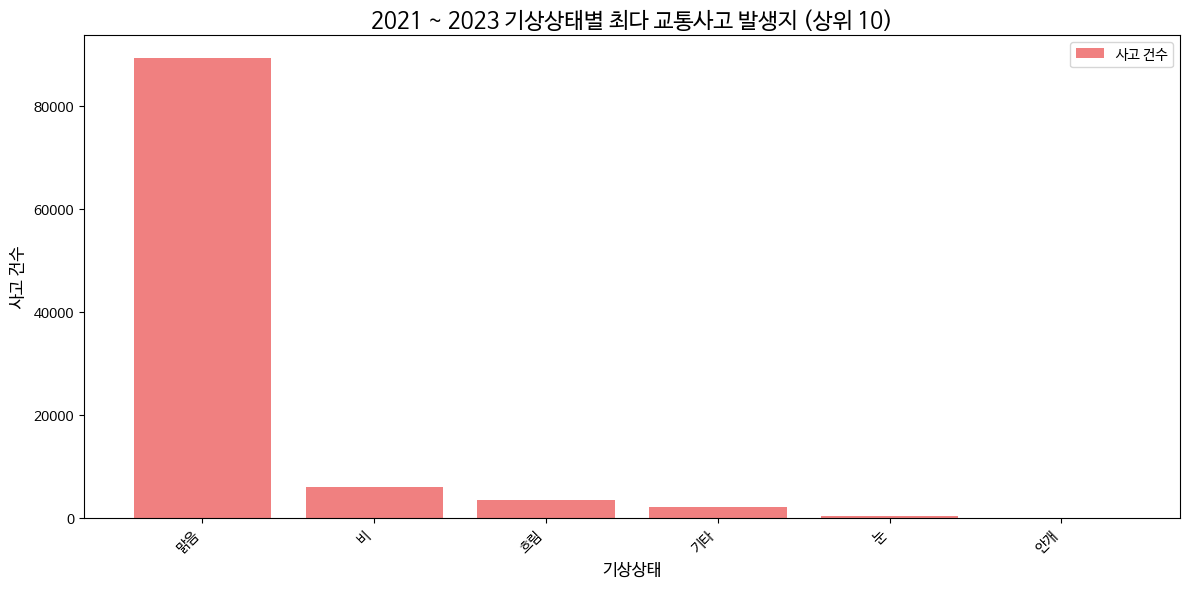

In [9]:
# 2021~2023 기상 상태별 최다 교통사고 발생지 파악
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')

# 엑셀 파일 불러오기
df = pd.read_excel('2021 ~ 2023 서울 기상상태별_교통사고지표현황.xls')

df_road = df[['기상상태', '사고건수']]

# 기상 상태별 사고 건수 합산
df_grouped = df_road.groupby('기상상태')['사고건수'].sum().reset_index()

# 사고 건수 기준으로 정렬
df_sorted = df_grouped.sort_values(by='사고건수', ascending=False)

# '합계' 행 제거
df_sorted = df_sorted[df_sorted['기상상태'] != '합계']

# 결과를 새로운 CSV 파일로 저장
output_file = '기상상태별_사고율.csv'
df_sorted.to_csv(output_file, index=False, encoding='utf-8-sig')

# 상위 10개 기상 상태 추출
df_top10 = df_sorted.head(10)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_top10['기상상태'], df_top10['사고건수'], color='lightcoral', label='사고 건수')

# 그래프 제목 및 레이블 설정
plt.title('2021 ~ 2023 기상상태별 최다 교통사고 발생지 (상위 10)', fontsize=16)
plt.xlabel('기상상태', fontsize=12)
plt.ylabel('사고 건수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()